In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bb2df3c062286956a2fc5999fd2dcf12


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | moose factory
Processing Record 4 of Set 1 | honningsvag
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | san quintin
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | pangnirtung
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | kulhudhuffushi
Processing Record 12 of Set 1 | saldanha
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | flinders
Processing Record 17 of Set 1 | vanimo
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | boke
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | lufilufi
Processing Record 22 of Set 1 | hobart
Processing Rec

Processing Record 36 of Set 4 | taywarah
Processing Record 37 of Set 4 | sao domingos
Processing Record 38 of Set 4 | namatanai
Processing Record 39 of Set 4 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 4 | laguna
Processing Record 41 of Set 4 | lermontovka
Processing Record 42 of Set 4 | cody
Processing Record 43 of Set 4 | macomer
Processing Record 44 of Set 4 | emerald
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | huangchuan
Processing Record 48 of Set 4 | kavieng
Processing Record 49 of Set 4 | anadyr
Processing Record 50 of Set 4 | giaveno
Processing Record 1 of Set 5 | san luis
Processing Record 2 of Set 5 | padang
Processing Record 3 of Set 5 | lompoc
Processing Record 4 of Set 5 | poso
Processing Record 5 of Set 5 | east london
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | pahrump
Processing Record 8 of Set 5 | byron bay
Processing Record 9 of Set 5 | khatanga


Processing Record 27 of Set 8 | bow island
Processing Record 28 of Set 8 | bilibino
Processing Record 29 of Set 8 | normandin
Processing Record 30 of Set 8 | rosario
Processing Record 31 of Set 8 | hovd
Processing Record 32 of Set 8 | tautira
Processing Record 33 of Set 8 | porto torres
Processing Record 34 of Set 8 | kaeo
Processing Record 35 of Set 8 | longonjo
Processing Record 36 of Set 8 | komsomolskiy
Processing Record 37 of Set 8 | treinta y tres
Processing Record 38 of Set 8 | chegdomyn
Processing Record 39 of Set 8 | gulshat
City not found. Skipping...
Processing Record 40 of Set 8 | mayor pablo lagerenza
Processing Record 41 of Set 8 | vytegra
Processing Record 42 of Set 8 | gornopravdinsk
Processing Record 43 of Set 8 | batticaloa
Processing Record 44 of Set 8 | christchurch
Processing Record 45 of Set 8 | chagda
City not found. Skipping...
Processing Record 46 of Set 8 | odweyne
Processing Record 47 of Set 8 | krasnoselkup
Processing Record 48 of Set 8 | buraydah
Processing

Processing Record 15 of Set 12 | xuddur
Processing Record 16 of Set 12 | sao felix do xingu
Processing Record 17 of Set 12 | karmana
City not found. Skipping...
Processing Record 18 of Set 12 | nikolayevsk-na-amure
Processing Record 19 of Set 12 | salto
Processing Record 20 of Set 12 | bubaque
Processing Record 21 of Set 12 | segezha
Processing Record 22 of Set 12 | spring valley
Processing Record 23 of Set 12 | kenora
Processing Record 24 of Set 12 | ayacucho
Processing Record 25 of Set 12 | gorom-gorom
Processing Record 26 of Set 12 | kununurra
Processing Record 27 of Set 12 | touros
Processing Record 28 of Set 12 | kalevala
Processing Record 29 of Set 12 | clarence town
Processing Record 30 of Set 12 | phan thiet
Processing Record 31 of Set 12 | cabinda
Processing Record 32 of Set 12 | aswan
Processing Record 33 of Set 12 | sorland
Processing Record 34 of Set 12 | chapais
Processing Record 35 of Set 12 | marathokambos
City not found. Skipping...
Processing Record 36 of Set 12 | brok

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,42.80,87,75,9.22,US,2021-04-21 03:44:22
1,Yellowknife,62.4560,-114.3525,44.60,53,20,5.75,CA,2021-04-21 03:48:51
2,Moose Factory,51.2585,-80.6094,17.60,67,90,13.80,CA,2021-04-21 03:48:52
3,Honningsvag,70.9821,25.9704,39.20,70,0,26.46,NO,2021-04-21 03:48:53
4,Punta Arenas,-53.1500,-70.9167,33.80,86,0,8.05,CL,2021-04-21 03:46:07
5,San Quintin,30.4833,-115.9500,57.63,83,80,8.63,MX,2021-04-21 03:48:54
6,Busselton,-33.6500,115.3333,70.00,61,0,3.00,AU,2021-04-21 03:48:55
7,Qaanaaq,77.4840,-69.3632,0.64,71,100,8.63,GL,2021-04-21 03:48:56
8,Pangnirtung,66.1451,-65.7125,18.91,78,100,7.96,CA,2021-04-21 03:48:58
9,Albany,42.6001,-73.9662,46.00,65,94,1.99,US,2021-04-21 03:48:59


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2021-04-21 03:44:22,57.7900,-152.4072,42.80,87,75,9.22
1,Yellowknife,CA,2021-04-21 03:48:51,62.4560,-114.3525,44.60,53,20,5.75
2,Moose Factory,CA,2021-04-21 03:48:52,51.2585,-80.6094,17.60,67,90,13.80
3,Honningsvag,NO,2021-04-21 03:48:53,70.9821,25.9704,39.20,70,0,26.46
4,Punta Arenas,CL,2021-04-21 03:46:07,-53.1500,-70.9167,33.80,86,0,8.05
...,...,...,...,...,...,...,...,...,...
582,San Francisco,US,2021-04-21 03:55:19,37.7749,-122.4194,55.00,76,40,20.71
583,Groa,NO,2021-04-21 03:55:20,62.6500,8.7167,37.40,87,90,8.05
584,Nishihara,JP,2021-04-21 03:55:21,26.1842,127.7558,77.00,68,75,20.71
585,Atar,MR,2021-04-21 03:55:09,20.5169,-13.0499,77.38,16,20,9.42


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

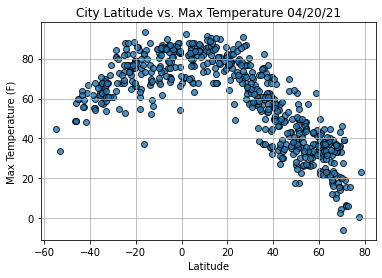

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

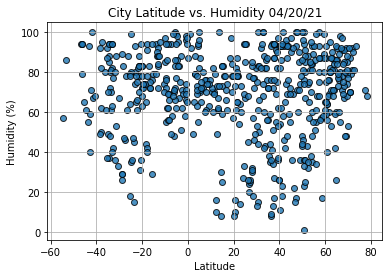

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

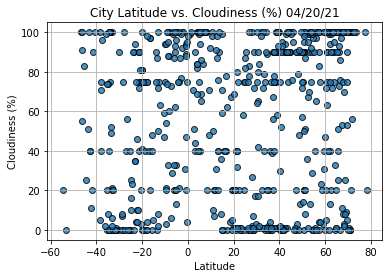

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

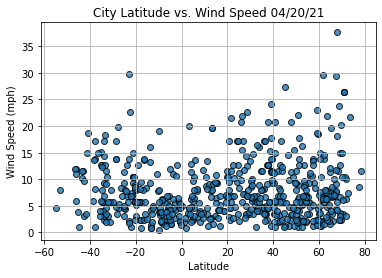

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()